In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# #ignore annoying warning (from sklearn and seaborn)
# import warnings
# def ignore_warn(*args, **kwargs):
#     pass
# warnings.warn = ignore_warn 

In [139]:
data = pd.read_csv('C:/Users/sksun/Desktop/DAwithPython/Week3/dataRegression.csv')
data.shape

(232298, 16)

In [140]:
data.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds
0,160,7.021084,5,7.184629,1,0,0,0,1,0,33.3755,-86.8045,0,1,-6.086017,-0.405465
1,160,6.715383,5,7.032624,1,0,0,0,1,1,33.4226,-86.7065,0,1,-7.032624,0.693147
2,160,6.684612,5,6.831954,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.831954,0.000000
3,160,6.665684,5,6.953684,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.260537,-0.693147
4,160,6.802395,5,7.168580,1,0,0,0,1,1,33.4226,-86.7065,1,1,-6.475433,0.000000


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

In [142]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [143]:
lm1_pred = lm1.predict(X_test)

In [144]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 0.18650559416104254
RMSE: 0.3738954006124712
R2_Score:  0.38814016082428826


In [145]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm1_pred), 'Actual_Rent': np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,1043.169724,1025.0
175725,1216.969575,1050.0
94751,777.537820,399.0
180883,605.126759,708.0
26057,1511.112048,1825.0
...,...,...
115642,794.323822,645.0
165159,783.862996,675.0
152673,1079.775793,2100.0
72157,1177.862806,1100.0


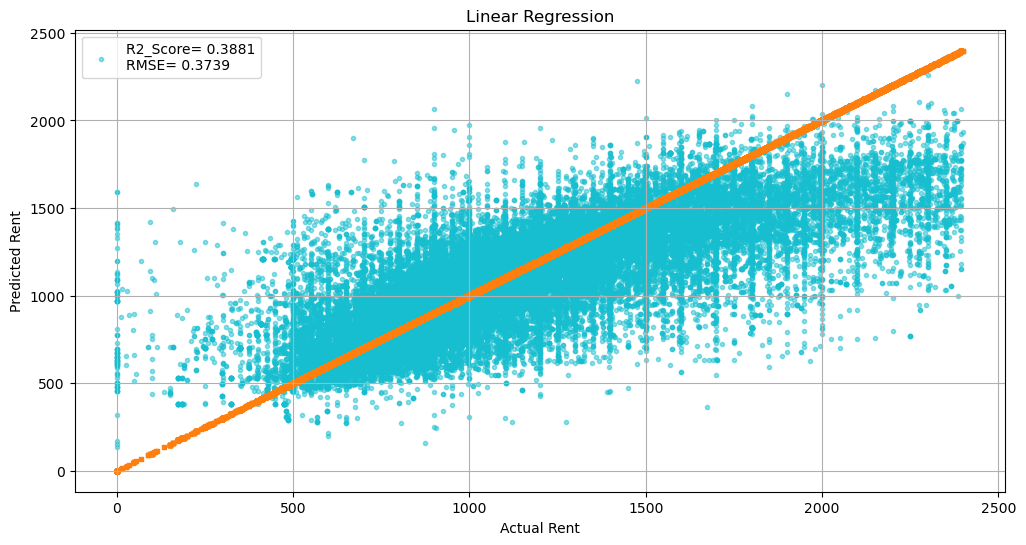

In [146]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, lm1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [147]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [148]:
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [149]:
lm2_pred = lm2.predict(X2_test)

In [150]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})
pred

,Predicted_Rent,Actual_Rent
195855,1040.824615,1025.0
175725,1218.552729,1050.0
94751,778.696716,399.0
180883,602.923150,708.0
26057,1507.950281,1825.0
...,...,...
115642,794.075039,645.0
165159,781.368177,675.0
152673,1075.564943,2100.0
72157,1174.936441,1100.0


In [151]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 0.18650559416104254
RMSE: 0.3738954006124712
R2_Score:  0.38814016082428826

all features, with scaling:
MAE: 0.18644871056769508
RMSE: 0.37388384700171695
R2_Score:  0.3881779739730197


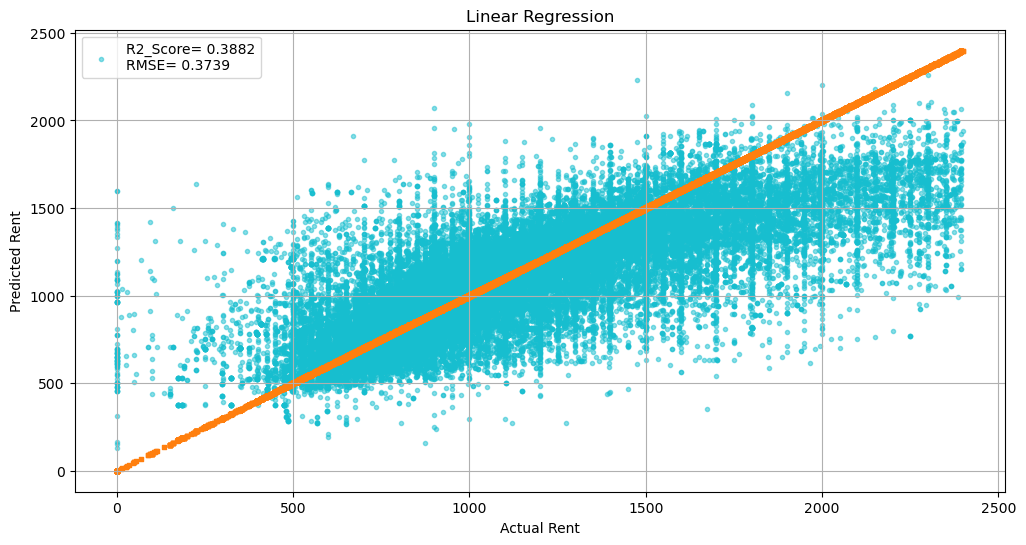

In [152]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred), 
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [153]:
# Decision Tree Regressor 

In [154]:
rf1 = tree.DecisionTreeRegressor()

In [155]:
rf1.fit(X_train, y_train)

DecisionTreeRegressor()

In [156]:
rf2 = tree.DecisionTreeRegressor()
rf2.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [157]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

In [158]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,960.561251,1025.0
175725,1055.551106,1050.0
94751,402.083658,399.0
180883,450.000000,708.0
26057,1825.000000,1825.0
...,...,...
115642,744.551209,645.0
165159,675.000000,675.0
152673,2350.000000,2100.0
72157,1116.844278,1100.0


In [160]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf2_pred), 'Actual_Rent': np.exp(y2_test)})
pred

,Predicted_Rent,Actual_Rent
195855,967.467151,1025.0
175725,1055.551106,1050.0
94751,402.083658,399.0
180883,600.000000,708.0
26057,2095.000000,1825.0
...,...,...
115642,744.551209,645.0
165159,752.000000,675.0
152673,2350.000000,2100.0
72157,1199.000000,1100.0


Decision Tree Regressor:

all features, No scaling:
MAE: 0.0707874753534689
RMSE: 0.23938418100360268
R2_Score:  0.7491912992181176

all features, with scaling:
MAE: 0.14348602028856022
RMSE: 0.3942894590766689
R2_Score:  0.31957222022286536


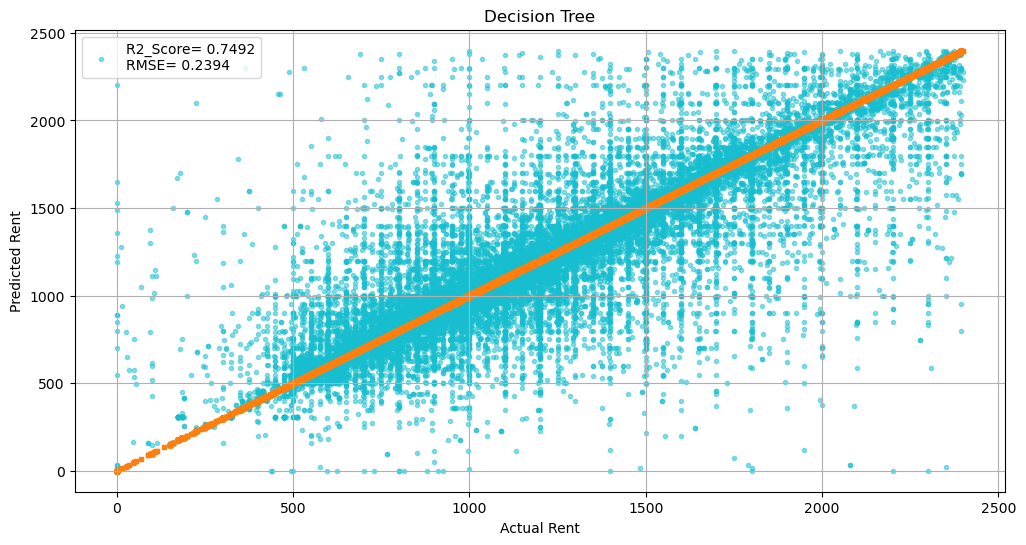

In [159]:
print('Decision Tree Regressor:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Decision Tree')
plt.grid()
plt.show()